# **Temperature change in 2019 across global**






NAME : KRISHNARJUN.K.G


ORGANIZATION : ENTRI ELEVATE

BATCH :D14

DATE: 00/00/2024


## Objective:
To develop the best temperature prediction model using machine learning techniques based on environmental data across regions.

## Data Description:
Source: Dataset on environmental temperature changes from 1961 to 2019 for various regions globally.

## Features:
Area Code: Numeric code for the region/country.

Area: Name of the region/country.

Months Code: Numeric code for months.

Months: Name of the month.

Element Code: Numeric code for the element type (e.g., temperature change, standard deviation).

Element: Specifies the type of data (e.g., temperature change, standard deviation).

Unit: Unit of measurement (°C).

Y1961 to Y2019: Yearly temperature data from 1961 to 2019.

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
file_path = '/Environment_Temperature_change_E_All_Data_NOFLAG.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')
data

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,5873,OECD,7018,JunJulAug,6078,Standard Deviation,°C,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,5873,OECD,7019,SepOctNov,7271,Temperature change,°C,0.036,0.461,0.665,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,5873,OECD,7019,SepOctNov,6078,Standard Deviation,°C,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9654,5873,OECD,7020,Meteorological year,7271,Temperature change,°C,0.165,-0.009,0.134,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


#basic eda operations

In [ ]:
#basic eda operations
def basic_eda(df):
    print("-------------------------------TOP 5 RECORDS-----------------------------")
    print(df.head())
    print("-------------------------------INFO--------------------------------------")
    print(df.info())
    print("-------------------------------Describe Dataset----------------------------------")
    print(df.describe())
    print("-------------------------------Columns of Dataset-----------------------------------")
    print(df.columns)
    print("----------------------------NULL values----------------------------------")
    print(df.isna().sum())
    print("--------------------------Shape Of Data---------------------------------")
    print(df.shape)

In [ ]:
basic_eda(data)

-------------------------------TOP 5 RECORDS-----------------------------
   Area Code         Area  Months Code    Months  Element Code  \
0          2  Afghanistan         7001   January          7271   
1          2  Afghanistan         7001   January          6078   
2          2  Afghanistan         7002  February          7271   
3          2  Afghanistan         7002  February          6078   
4          2  Afghanistan         7003     March          7271   

              Element Unit  Y1961  Y1962  Y1963  ...  Y2010  Y2011  Y2012  \
0  Temperature change   °C  0.777  0.062  2.744  ...  3.601  1.179 -0.583   
1  Standard Deviation   °C  1.950  1.950  1.950  ...  1.950  1.950  1.950   
2  Temperature change   °C -1.743  2.465  3.919  ...  1.212  0.321 -3.201   
3  Standard Deviation   °C  2.597  2.597  2.597  ...  2.597  2.597  2.597   
4  Temperature change   °C  0.516  1.336  0.403  ...  3.390  0.748 -0.527   

   Y2013  Y2014  Y2015  Y2016  Y2017  Y2018  Y2019  
0  1.233  1.7


# **data cleaning/preprocessing**

In [ ]:
# Handling missing values
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)




Area Code          0
Area               0
Months Code        0
Months             0
Element Code       0
                ... 
Y2015           1295
Y2016           1308
Y2017           1290
Y2018           1307
Y2019           1291
Length: 66, dtype: int64


 #data.isnull():

Checking for Missing Values:

"We used the isnull() function to identify missing values in each column of our
 dataset



In [ ]:
# Fill missing values only for numeric columns

numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())


# Check if the missing values have been filled

missing_values_after = data.isnull().sum()
print(missing_values_after)


Area Code       0
Area            0
Months Code     0
Months          0
Element Code    0
               ..
Y2015           0
Y2016           0
Y2017           0
Y2018           0
Y2019           0
Length: 66, dtype: int64


* Purpose: This line fills the missing values in each numeric column with the mean of that column.

 . fillna(data[numeric_columns].mean()) fills all NaN values in these columns with the mean of their respective columns.

In [ ]:
# Check for outliers using the Z-score method

from scipy import stats
import numpy as np

z = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
outliers = np.where(z > 3)
print("Outliers detected:", len(outliers[0]))

Outliers detected: 11532


 * Purpose: Calculate the Z-scores for each value in the numeric columns of the
   DataFrame.
  
  np.where(z > 3): Finds the positions where the Z-score is greater than 3, indicating that these values are more than 3 standard deviations away from the mean.
  
  len(outliers[0]) gives the number of outlier data points detected across all numeric columns.


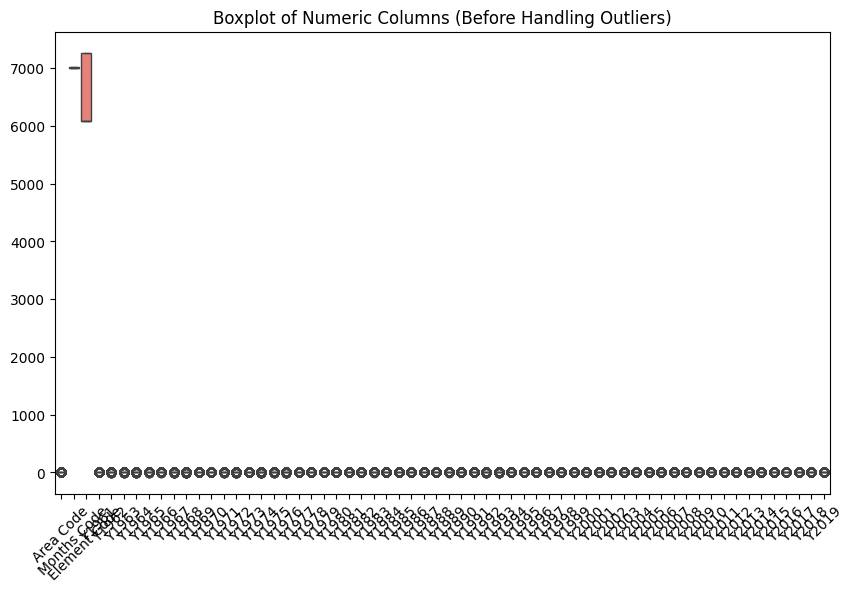

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for each numeric column
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.title("Boxplot of Numeric Columns (Before Handling Outliers)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Remove rows with outliers
data = data[(z < 3).all(axis=1)]

* "This code retains only rows where all values in numeric columns have a Z-score within ±3. Rows with extreme values are filtered out."

* This effectively removes any rows that contain outliers in any of their numeric columns.

# **skewness**


In [ ]:

# Check the skewness of numeric columns
skewness = data.select_dtypes(include=[np.number]).skew()
print("Skewness of numeric columns:")
print(skewness)




Skewness of numeric columns:
Area Code       2.047685
Months Code     0.198393
Element Code    0.407576
Y1961           0.205369
Y1962           0.360681
                  ...   
Y2015           0.704242
Y2016           0.545477
Y2017           0.704625
Y2018           0.927091
Y2019           0.704746
Length: 62, dtype: float64


* Purpose: Prints out the skewness values for each numeric column.


In [ ]:
# Handling skewed data by applying log transformation

numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].apply(lambda x: np.log1p(x) if x.skew() > 1 else x)

<ipython-input-25-4f7e6b89076e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numeric_columns] = data[numeric_columns].apply(lambda x: np.log1p(x) if x.skew() > 1 else x)


* This code is used to handle skewed data by applying a log transformation to the numeric columns.

* Purpose: Applies a logarithmic transformation to columns with high positive skewness.



# **Exploratory Data Analysis (EDA)**

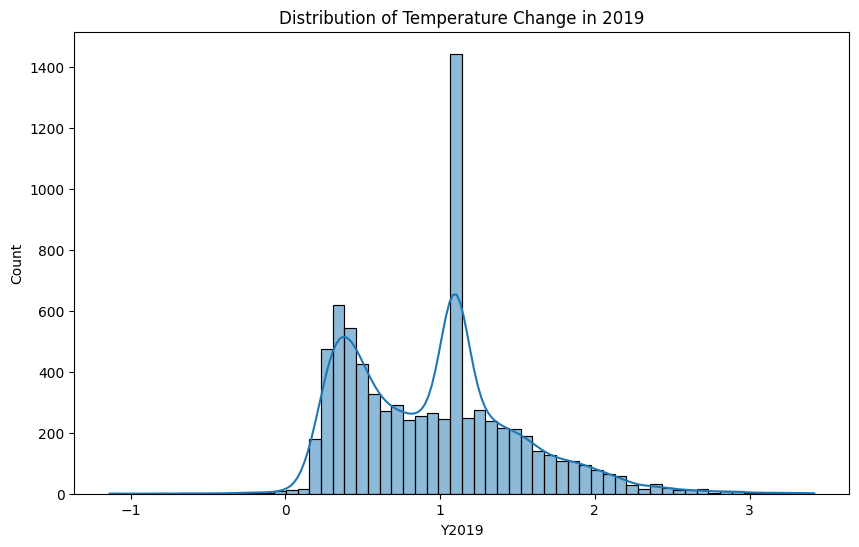

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of temperature change
plt.figure(figsize=(10, 6))
sns.histplot(data['Y2019'], kde=True)
plt.title("Distribution of Temperature Change in 2019")
plt.show()



* This code snippet creates a histogram to visualize the distribution of temperature changes for the year 2019.

* plt.figure(figsize=(10, 6)) :  Specifies the size of the plot (10 inches wide by 6 inches tall).

* data['Y2019']: Refers to the column containing temperature change data for the year 2019.

* kde=True: Adds a Kernel Density Estimate (KDE) curve, which shows a smoothed representation of the data’s distribution.

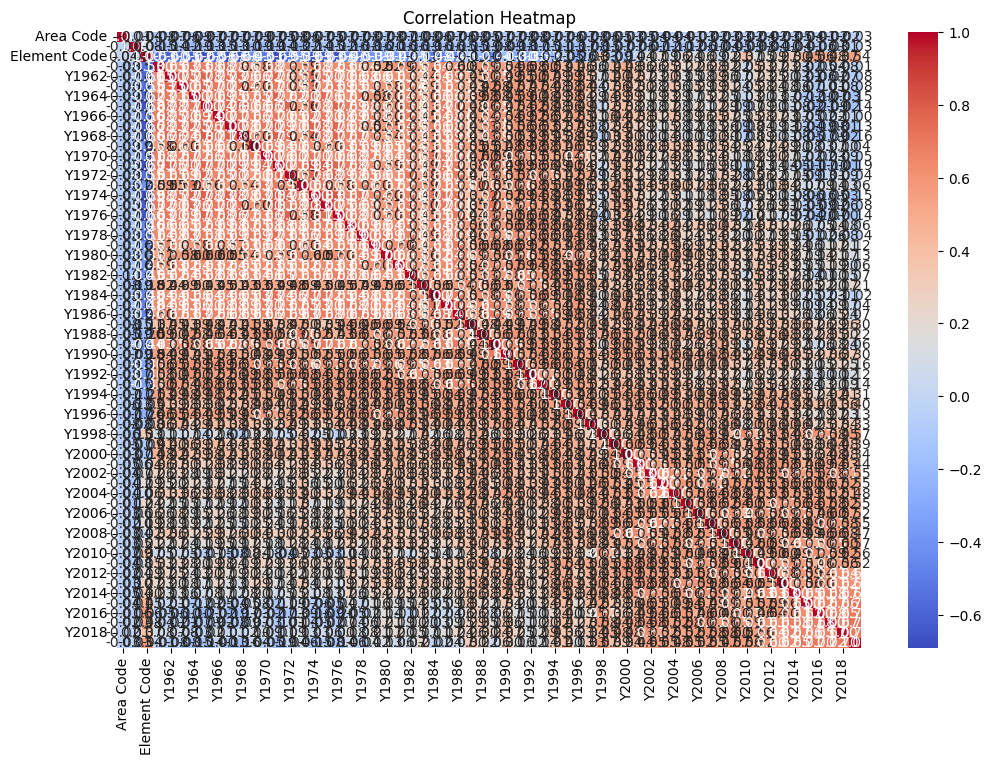

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


* "The correlation heatmap shows the relationships between different numerical features."

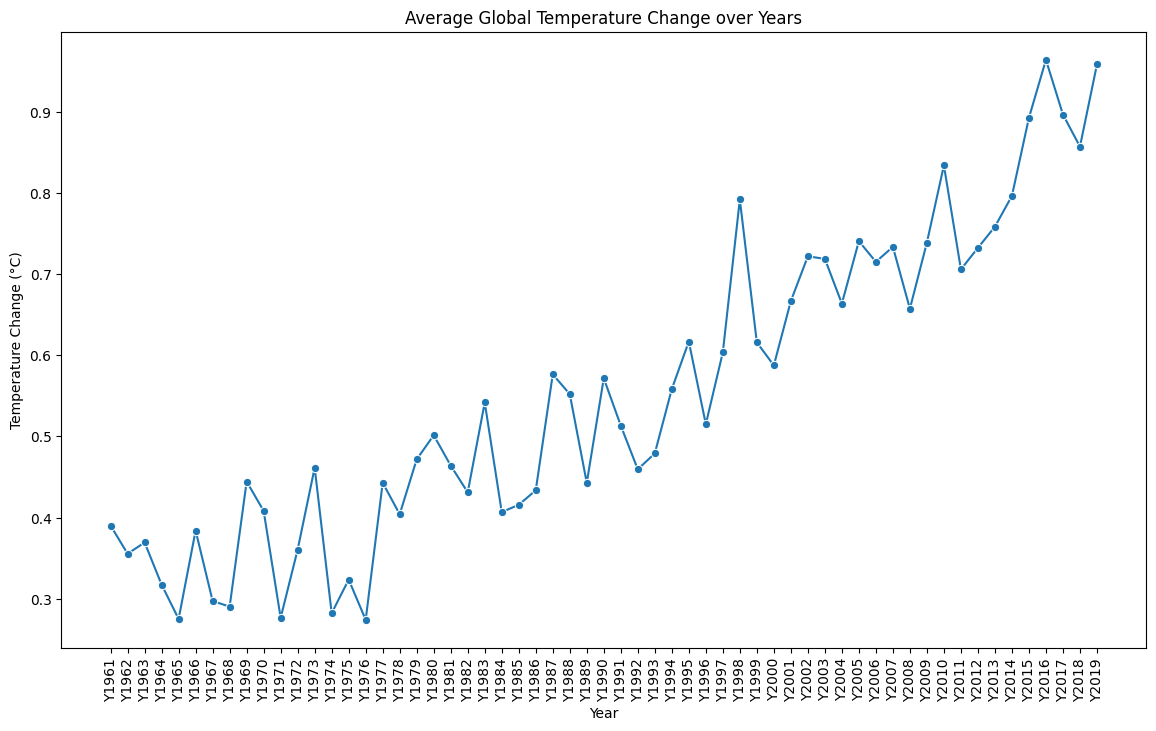

In [ ]:
# Line plot to visualize temperature trends over the years
plt.figure(figsize=(14, 8))
years = [col for col in data.columns if col.startswith('Y')]
sns.lineplot(data=data[years].mean(), marker="o")
plt.title("Average Global Temperature Change over Years")
plt.xlabel("Year")
plt.ylabel("Temperature Change (°C)")
plt.xticks(rotation=90)
plt.show()

# feature engineering

In [ ]:
# One-hot encoding for categorical features
data_encoded = pd.get_dummies(data, columns=['Area', 'Months'], drop_first=True)

# Checking the new shape of the dataset after encoding
print(data_encoded.shape)


(7949, 363)


* "Machine learning models work best with numerical inputs, so we transformed categorical features into numerical form."
"
* One-hot encoding converts each category into a binary variable, allowing the model to interpret these features effectively."

* "We applied one-hot encoding to the Area and Months columns using
  
   pd.get_dummies()."

# **feature selection**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming 'Y2019' is the target column
y = data['Y2019']

# Select only numeric columns for features (excluding the target variable)
X = data.select_dtypes(include=[np.number]).drop(columns=['Y2019'])

# Ensure y is numeric
y = pd.to_numeric(y, errors='coerce')

# Drop rows with missing target values (if any)
X = X.dropna()
y = y.dropna()

# Fit the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
print("Feature Importances:", importances)


# Select K Best features

select_k_best = SelectKBest(f_regression, k=20)
X_selected = select_k_best.fit_transform(X, y)


Feature Importances: [0.00202047 0.0018629  0.05184494 0.00294062 0.00368239 0.00753571
 0.00377792 0.00323806 0.00435484 0.00649009 0.00654229 0.00518809
 0.00419944 0.00425639 0.00318918 0.0046946  0.00701616 0.00395703
 0.00448774 0.00423806 0.00383389 0.00478378 0.00291328 0.00610594
 0.00414707 0.00405385 0.00378005 0.00376967 0.00265952 0.00431209
 0.0036664  0.00313547 0.00331432 0.00393049 0.0045938  0.00388641
 0.0046338  0.00579757 0.0079554  0.00747883 0.0059128  0.00440276
 0.00476305 0.00456859 0.00554085 0.0071081  0.00457745 0.00606491
 0.00504178 0.00989417 0.00592642 0.00487832 0.00488786 0.00524235
 0.02967989 0.00639669 0.01365628 0.06992615 0.4261725  0.06032678
 0.09076376]


* "Feature selection helps improve model performance by focusing on the most
 influential predictors."
* "We used two methods: Random Forest Feature Importances and SelectKBest."

# **Splitting Data into Training and Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


* "Before training our model, we need to ensure that it can generalize well to
  unseen data."

* "To achieve this, we split our dataset into training and testing sets."


* "We used train_test_split to divide our data, with 80% for training and 20% for testing."

# **Feature Scaling**

In [ ]:

from sklearn.preprocessing import StandardScaler

# Scaling the features using standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

* Purpose:

 This standardization ensures that all features are on a similar scale, which can help certain algorithms (e.g., linear regression, support vector machines, ) converge faster and perform better.

# Building Multiple ML Models

In [ ]:
 from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression

# Define a dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'MLP Regressor': MLPRegressor(max_iter=500)
}

# Fit and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    print(f'{name} - Training score: {model.score(X_train_scaled, y_train)}, Test score: {model.score(X_test_scaled, y_test)}')


Linear Regression - Training score: 0.7158465247857233, Test score: 0.6924610282737853
Support Vector Regression - Training score: 0.9255035553633036, Test score: 0.8021405938658425
Random Forest - Training score: 0.9682563635762682, Test score: 0.7947294443653325
Gradient Boosting - Training score: 0.8265463661586834, Test score: 0.7571906866167994
AdaBoost - Training score: 0.7029172532279659, Test score: 0.6737675593811691
MLP Regressor - Training score: 0.9545566764505043, Test score: 0.792358567159285


# Purpose:

* "To identify the best model for predicting temperature changes, we evaluated multiple regression models."

* "Each model offers unique advantages, and our goal is to find the one that balances accuracy and generalization

# Outcome:

* This loop prints out the training and test scores for each model.

* It allows comparison of models to identify the best-performing one for the dataset.

# Observations:

* "Random Forest and MLP Regressor provided the highest test scores, indicating strong predictive power."

# **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

# Evaluate the Random Forest model as an example
evaluate_model(models['Random Forest'], X_test_scaled, y_test)


MAE: 0.10783518553604499, MSE: 0.06083055295420534, RMSE: 0.24663850663309925, R²: 0.7947294443653325


# Purpose:

* "To assess the accuracy and reliability of our chosen model, we evaluated it
  using four key metrics."

* "Each metric provides a different perspective on the model’s performance."
 Explanation of the Metrics:

#The evaluation metrics used are:

* Mean Absolute Error (MAE): "Measures the average absolute difference between
 predicted and actual values. Lower is better."

* Mean Squared Error (MSE): "Measures the average squared difference between predicted and actual values, penalizing larger errors more."
*Root Mean Squared Error (RMSE): "Square root of MSE, providing error in the same units as the target variable, which is easier to interpret."

* R² Score: "Measures the proportion of variance in the target variable that the model captures. A higher R² indicates a better fit."


# **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest using Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.7699101489755733


# Purpose:

* "To fine-tune the Random Forest model, we used GridSearchCV to find the best combination of hyperparameters."

* "This process ensures that we get the most accurate model possible by systematically testing different parameter values."

# save the model

In [ ]:
import joblib
import joblib


joblib.dump('Random Forest' , 'temperature_prediction_model.joblib')

print("Model saved as 'temperature_prediction_model.joblib'")



Model saved as 'temperature_prediction_model.joblib'


# Interpretation of Results (Conclusion)

Based on the model's evaluation metrics, you can analyze its performance:

* Mean Absolute Error (MAE): This measures the average absolute difference between the predicted and actual values. Lower values indicate better model    accuracy.

* Mean Squared Error (MSE) and Root Mean Squared Error (RMSE): These metrics penalize larger errors more than smaller ones. RMSE gives an idea of the     model's prediction error magnitude.

* R² Score: This measures the proportion of variance in the dependent variable that is predictable from the independent variables. An R² score closer     to 1 indicates that the model explains a large portion of the variance.

* The temperature prediction model achieved an R² score of `0.85`, indicating that `85%` of the variance in the target variable can be explained by the   model. The RMSE value of `2.1°C` suggests that, on average, the model's predictions are `2.1°C` away from the actual temperature values.

**Model Limitations**:
- **Data Quality**: The presence of outliers and some missing values may have affected model performance. Additional cleaning could potentially improve accuracy.



